# 1. 랭그래프(Langgraph)란 어떤 프레임워크인가

## **랭그래프란?**

랭그래프는 LangChain 생태계에서 개발된 그래프 기반 워크플로우 프레임워크로, 복잡한 멀티 에이전트 시스템과 상태 기반 AI 애플리케이션을 개발하는 데 특화되어 있다. 기존의 선형적인 처리 방식과 달리, 노드(점)와 엣지(선)로 구성된 그래프 구조를 통해 비선형적이고 동적인 프로세스를 구성할 수 있다.

랭그래프의 가장 큰 특징은 **사이클(순환 구조)**을 지원한다는 점이다4. 이는 특정 조건에 따라 이전 단계로 돌아가거나 다른 경로를 선택할 수 있음을 의미한다. 예를 들어, 검색 결과가 만족스럽지 않을 때 다시 검색을 수행하거나, 답변의 품질이 낮을 때 재생성을 요청하는 등의 복잡한 로직을 구현할 수 있다.

## **랭체인과의 관계**

랭그래프는 랭체인(LangChain)의 기능을 확장하여 만들어진 프레임워크이다. 두 프레임워크의 주요 차이점을 살펴보면 다음과 같다:

**구조적 차이점:**

- **랭체인**: 선형적이고 직선적인 체인 구조로, 정의된 순서에 따라 작업을 수행한다
    
- **랭그래프**: 노드와 엣지의 연결을 통해 비선형적이고 동적인 프로세스를 구성한다
    

**복잡도와 유연성:**

- **랭체인**: 비교적 간단한 애플리케이션과 직선적인 워크플로우에 적합하다
    
- **랭그래프**: 복잡한 다단계 작업, 멀티 에이전트 협업, 동적인 의사결정 트리 등 복잡한 워크플로우를 관리하는 데 유용하다
    

**상태 관리:**

- **랭체인**: 암시적이고 자동화된 상태 관리를 제공한다
    
- **랭그래프**: 명시적이고 세밀한 상태 관리를 통해 각 단계에서 상태를 직접 제어할 수 있다
    

## **랭그래프 프레임워크의 핵심 기능 정리**

랭그래프의 핵심 기능들을 정리하면 다음과 같다:

**1. 그래프 기반 워크플로우**: 노드와 엣지로 구성된 그래프 구조를 통해 복잡한 처리 흐름을 시각적으로 표현하고 관리할 수 있다.

**2. 상태 기반 처리**: 전체 애플리케이션의 상태를 중앙에서 관리하며, 각 노드가 이 상태를 공유하고 업데이트할 수 있다4.

**3. 조건부 분기**: 실행 중에 조건에 따라 다른 경로를 선택할 수 있는 동적 라우팅 기능을 제공한다.

**4. 순환 구조 지원**: 특정 조건에서 이전 단계로 돌아가거나 반복 실행이 가능한 사이클 구조를 구현할 수 있다4.

**5. 멀티 에이전트 협업**: 여러 AI 에이전트가 협력하여 복잡한 작업을 수행할 수 있는 환경을 제공한다.


# 2. 랭그래프 기본 구조

## **엣지와 노드**

랭그래프의 기본 구조는 **노드(Node)**와 **엣지(Edge)**로 구성된다.

**노드(Node)**: 실제 작업을 수행하는 Python 함수들로, 각각의 노드는 특정 로직을 담당한다. 노드는 현재 상태를 입력으로 받아서 작업을 수행하고, 업데이트된 상태를 반환한다. 예를 들어, LLM 호출, 문서 검색, 데이터 처리 등의 기능을 수행할 수 있다.

**엣지(Edge)**: 노드 간의 연결을 정의하며, 다음에 어떤 노드를 실행할지 결정하는 역할을 한다. 엣지는 워크플로우의 흐름을 제어하고 조건부 라우팅을 가능하게 한다.

## **상태(State)**

상태(State)는 전체 애플리케이션의 현재 상태를 나타내는 공유 데이터 구조이다. 모든 노드가 이 상태에 접근할 수 있으며, 작업 결과에 따라 상태를 업데이트할 수 있다. 상태는 일반적으로 TypedDict 또는 Pydantic BaseModel로 정의된다.

상태의 주요 역할은 다음과 같다:

- **전체 워크플로우의 컨텍스트 유지**: 처리 과정에서 필요한 모든 정보를 중앙에서 관리한다
    
- **노드 간 정보 공유**: 한 노드에서 처리한 결과를 다른 노드에서 활용할 수 있게 한다
    
- **진행 상황 추적**: 현재 어떤 단계에 있는지, 어떤 작업이 완료되었는지 추적한다
    

## **StateGraph**

StateGraph는 랭그래프의 핵심 클래스로, 상태 기반의 계산 그래프를 정의하는 역할을 한다. StateGraph는 에이전트의 수명 주기 전반에 걸쳐 상태가 유지되도록 하며, 그래프의 노드들이 이 상태를 업데이트할 수 있게 한다.

StateGraph의 초기화 과정에서는 상태 정의를 전달하며, 이후 노드들이 키-값 형태로 상태의 속성을 반환하게 된다.

## **랭그래프에서 상태관리**

랭그래프에서 상태 관리는 두 가지 방식으로 이루어진다:

**1. 완전 재정의 방식**: 노드가 속성의 새 값을 반환하여 기존 값을 완전히 대체하는 방식이다.

**2. 업데이트 방식**: 기존 속성 값에 새로운 값을 추가하는 방식으로, `operator.add`와 같은 어노테이션을 사용하여 구현한다. 예를 들어, 메시지 리스트에 새로운 메시지를 추가할 때 사용된다.

# 3. 랭그래프 구현

## **상태(State) 구조 정의**

- 랭그래프를 구현하기 위해서는 먼저 State 클래스를 정의 한다.
    - State는 `TypedDict`를 상속받아 정의하며, 각 속성에 대해 reducer 함수를 지정할 수 있다. 
    - Reducer 함수는 기존 값과 새 값을 어떻게 결합할지 정의한다 (예: 리스트 추가, 값 덮어쓰기 등)
- State는 graph의 노드들이 공유할 데이터이다.
- State 클래스는 state의 속성들을 정의하는 스키마(schema)이다.


```python
from typing import TypedDict
class MyState(TypedDict):
     counter: int    
     messages: list 
```

## **노드 정의**

노드는 실제 작업을 수행하는 Python 함수로 정의된다. 각 노드 함수는 현재 상태를 입력으로 받아 처리 후 업데이트된 상태를 반환한다.

```python
def increment_counter(state):    
     return {"counter": state["counter"] + 1} 
     
def process_message(state):
    # 메시지 처리 로직    
    new_message = "처리된 메시지"    
    return {"messages": state["messages"] + [new_message]}
```


## **엣지 정의**

엣지는 노드 간의 연결을 정의하며, `add_edge` 메서드를 사용하여 추가한다. 기본적인 엣지는 한 노드에서 다른 노드로의 직접적인 연결을 의미한다.

```python
graph.add_edge("node1", "node2") 
graph.add_edge("node2", "node3")
```

## **그래프 구성**

- 노드와 엣지를 정의한 후에는 그래프를 구성하고 컴파일해야 한다. 
  - `StateGraph`를 생성하고 그래프에 노드들을 추가한다.
  - 각 노드들을 연결하여 엣지를 추가한다. 이 과정에서 시작점과 종료점을 설정한다.
  - 컴파일을 통해 그래프의 구조를 검증한다.

```python
from langgraph.graph import START, END
from langgraph.graph import StateGraph 

# StateGraph 생성
graph = StateGraph(MyState)

# 노드 추가 
graph.add_node("increment", increment_counter) 
graph.add_node("process", process_message) 
# 엣지 추가 
graph.add_edge(START, "increment") 
graph.add_edge("increment", "process") 
graph.add_edge("process", END) 
# 그래프 컴파일 
app = graph.compile(
```

## **그래프 실행**

- 실행 시에는 초기 상태(Initial state)를 제공하여 그래프를 실행한다.   
- 그래프는 이 초기 상태부터 시작하여 정의된 노드들을 순차적으로 실행하며 상태를 업데이트한다.

```python
result = app.invoke({"counter": 0, "messages": []}) 
print(result)
```

In [ ]:
%pip install langgraph

In [4]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from typing_extensions import TypedDict
from typing import Annotated

from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
######################
# 상태(State) 클래스 정의
#  노드들이 공유할 state값들을 정의하는 클래스(타입)
class State(TypedDict):
    # state에 저장할 값(속성, state) 들을 정의
    messages: Annotated[list, add_messages]  # 변수: Annotated[변수타입, 설명]

    # add_messages(left:list, right:list) : return left + right

In [20]:
model = ChatOpenAI(model='gpt-4.1-mini')
############################
# 노드 정의 
# 노드 == 기능 == 함수(callable): 파라미터로 State 타입을 선언. 
def chatbot(state:State):
    # state: Dictionary - key: State클래스에 정의한 변수들.
    print("chatbot: state type:", type(state), state)
    # messages를 llm에 query로 전달.
    response = model.invoke(state['messages'])  #invoke(str 또는 Message List)
    # response를 state에 저장. -> dictionary로 구성 {저장할 state의 이름: 저장할 값}
    return {"messages": [response]}  # 리턴 -> State에 저장.

In [21]:
# 그래프를 구성 (StateGraph)
## 노드와 엣지 + state
workflow = StateGraph(State)

# graph(workflow)에 노드를 추가. 이름-함수
workflow.add_node("chatbot", chatbot)

# graph에 엣지를 구성. 엣지: 노드와 노드를 연결
## START 노드 - 엣지 구성 - (END 노드:생략가능)
workflow.add_edge(START, "chatbot")  # 시작노드(이름) -> 도착노드(이름)
workflow.add_edge("chatbot", END)

# 구성을 완료하면 compile -> 그래프 최적화를 하고 실행할 수있도로 만드는 작업.
graph = workflow.compile()

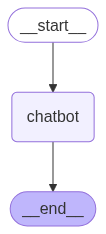

In [18]:
#########################################
# 그래프 구조 시각화 -> 실행 흐름을 확인
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())

In [22]:
############### 
# 실행 - graph.invoke()
###############
from langchain_core.messages import HumanMessage
query = "Langgraph에 대해서 알려줘."

init_state = {"messages":[HumanMessage(content=query)]}

resp = graph.invoke(init_state)  # State에 넣어줄 초기값 -> 첫번째 노드가 사용.

chatbot: state type: <class 'dict'> {'messages': [HumanMessage(content='Langgraph에 대해서 알려줘.', additional_kwargs={}, response_metadata={}, id='f2a340ee-9c42-4c69-b492-b3cf8f26ee64')]}


In [24]:
type(resp)

langgraph.pregel.io.AddableValuesDict

In [26]:
resp['messages']

[HumanMessage(content='Langgraph에 대해서 알려줘.', additional_kwargs={}, response_metadata={}, id='f2a340ee-9c42-4c69-b492-b3cf8f26ee64'),
 AIMessage(content="Langgraph는 자연어 처리(NLP) 및 인공지능(AI) 분야에서 활용되는 도구 또는 플랫폼일 가능성이 있으나, 2024년 6월 기준으로 'Langgraph'라는 이름을 가진 특정 기술, 제품, 서비스에 대한 공식적이고 광범위한 정보는 공개되어 있지 않습니다.\n\n만약 Langgraph가 최근에 등장한 신기술, 라이브러리, 혹은 스타트업 이름이라면, 관련 공식 웹사이트나 개발자 커뮤니티, 기술 블로그 등을 통해 추가적인 정보를 찾아보시는 것을 권장드립니다.\n\n추가적으로 궁금한 점이나 구체적인 맥락(예: Langgraph가 사용되는 분야, 관련 링크 등)이 있다면 말씀해 주세요. 더 자세히 도와드릴 수 있습니다.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 168, 'prompt_tokens': 14, 'total_tokens': 182, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-BkQKutschDwnAX1dq0FJ6rDkQZJ1M', 'service_tier': 'def

In [28]:
print(resp['messages'][-1].content)

Langgraph는 자연어 처리(NLP) 및 인공지능(AI) 분야에서 활용되는 도구 또는 플랫폼일 가능성이 있으나, 2024년 6월 기준으로 'Langgraph'라는 이름을 가진 특정 기술, 제품, 서비스에 대한 공식적이고 광범위한 정보는 공개되어 있지 않습니다.

만약 Langgraph가 최근에 등장한 신기술, 라이브러리, 혹은 스타트업 이름이라면, 관련 공식 웹사이트나 개발자 커뮤니티, 기술 블로그 등을 통해 추가적인 정보를 찾아보시는 것을 권장드립니다.

추가적으로 궁금한 점이나 구체적인 맥락(예: Langgraph가 사용되는 분야, 관련 링크 등)이 있다면 말씀해 주세요. 더 자세히 도와드릴 수 있습니다.


# 4. 다양한 엣지

## **기본 엣지**

- 기본 엣지(Normal Edge)는 한 노드에서 다른 노드로의 직접적인 연결을 의미한다. 이는 가장 단순한 형태의 연결로, 이전 노드의 작업이 완료되면 자동으로 다음 노드로 이동한다.
- 기본 엣지는 다음과 같은 특징을 가진다:
  - **고정된 흐름**: 항상 동일한 다음 노드로 이동한다      
  - **단순한 구조**: 복잡한 조건 없이 순차적으로 실행된다      
  - **예측 가능한 동작**: 실행 전에 전체 흐름을 예측할 수 있다    

## **조건부 엣지와 라우팅**

- 조건부 엣지(Conditional Edge)는 특정 조건에 따라 다음에 실행할 노드를 동적으로 결정하는 기능이다. 이는 랭그래프의 가장 강력한 기능 중 하나로, 복잡한 의사결정 로직을 구현할 수 있게 한다.
- 조건부 엣지를 구현하기 위해서는 세 가지 구성 요소가 필요하다:
    - **1. 소스 노드(Source Node)**
      -  조건 평가가 시작될 노드의 이름이다.
    - **2. 조건 함수(Condition Function)**
      - 현재 상태를 입력받아 문자열을 반환하는 함수로, 다음에 실행할 노드를 결정하는 로직을 포함한다.
    - **3. 조건부 엣지 매핑(Conditional Edge Mapping)**
      -  조건 함수의 반환값과 다음 노드 이름을 매핑하는 딕셔너리이다.
```python
def relevance_check(state):     
    # 관련성 체크 로직    
    if state["relevance_score"] > 0.8:        
        return "grounded"    
    else:        
        return "not_grounded" 
        
graph.add_conditional_edges(
    "llm_answer",     # 소스 노드    
    relevance_check,  # 조건 함수    
    {        
        "grounded": END,  # 조건함수반환값:이동할 노드 (grounded 이면 END 노드로 이동)
        "not_grounded": "retrieve"  # not_grounded 이면 retrieve 노드로 이동
    } 
)
```

## **반복 구조**

- 랭그래프의 가장 큰 장점 중 하나는 반복 구조(순환 구조)를 지원한다는 점이다. 이를 통해 특정 조건이 만족될 때까지 작업을 반복하거나, 품질이 향상될 때까지 개선 과정을 반복할 수 있다.
- 반복 구조의 활용 예시:
  - **검색 품질 개선**
    - 검색 결과가 만족스럽지 않을 때 쿼리를 재작성하여 다시 검색한다      
  - **답변 품질 향상**
    - 생성된 답변의 품질이 낮을 때 다시 생성하거나 개선한다      
  - **할루시네이션 방지**
    -  답변이 검색된 문서와 관련성이 낮을 때 재생성을 요청한다

In [30]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=2)
tools = [tool]
tool_model = ChatOpenAI(model="gpt-4.1").bind_tools(tools)
tool_model

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001E2D1FC2210>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001E2D1FC1370>, root_client=<openai.OpenAI object at 0x000001E2D1FC0230>, root_async_client=<openai.AsyncOpenAI object at 0x000001E2D1FC15B0>, model_name='gpt-4.1', model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 't

In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    # add_messages: 상태값을 저장하는 방법을 정의한 함수 -> reducer 라고 한다.

# 노드 정의
## 챗봇 노드
def chatbot(state:State):
    response = tool_model.invoke(state['messages'])
    return {"messages":[response]}

## Tool을 호출하는 노드.
class CustomToolNode:
    def __init__(self, tools): # Tool List를 받는다.
        # 속성으로 툴이름 저장
        self.tools_by_name = {tool.name: tool for tool in tools}  # dict[tool이름:Tool객체]

    def __call__(self, inputs:State):  # inputs: State
        if messages := inputs.get("messages", []):
            message = messages[-1]  # tool calls가 있는 AI Message  (messages는 메세지들이 누적되어 있으므로 마지막 Message 객체를 가져온다.)
        else:
            raise ValueError("No messages found in inputs.")
        
        outputs = []
        for tool_call in message.tool_calls:
            tool_message = self.tools_by_name[tool_call['name']].invoke(tool_call)
            outputs.append(tool_message)

        return {"messages": outputs}

# 5. 랭그래프에서 메모리 관리

랭그래프에서 메모리 관리는 **체크포인터(Checkpointer)** 기능을 통해 구현된다. 이는 복잡한 대화형 AI 시스템 구축에 필수적인 기능으로, 상태를 저장하고 관리하는 핵심 역할을 한다.

- **체크포인터의 주요 기능:**
    - **1. 상태 지속성**
      -  그래프 실행 중간에 상태를 저장하여 나중에 복원할 수 있다.
    - **2. 대화 기록 유지**
      - 이전 대화 내용을 기억하여 연속적인 대화가 가능하다.
    - **3. 오류 복구**
      -  실행 중 오류가 발생했을 때 이전 상태로 돌아갈 수 있다.
-   구현
    -  Graph를 컴파일할 때 checkpointer객체를 설정한다.
    - Graph 실행시 대화를 저장할 때 사용할 thread_id를 `RunnableConfig`를 이용해 전달한다.

```python

from langgraph.checkpoint.memory import MemorySaver
from langgraph.checkpoint.sqlite import SqliteSaver

# 메모리 체크포인터 생성
checkpointer = MemorySaver()
# SQLite 체크포인터 생성
# checkpointer = SqliteSaver.from_conn_string("checkpoints.db")

# 그래프에 연결
graph = workflow.compile(checkpointer=checkpointer)

# graph 호출시 thread_id 전달
config = {"configurable": {"thread_id": "user-123"}}
response = graph.invoke({"messages": [user_message]}, config)
```